# In-Class Exercise 1: Monte Carlo Estimates of $\pi$

Using the template below as a guide, we will use stochastic techniques to develop an estimate of $\pi$ for data sets of various sizes (N=100, 1,000, and 10,000) using both a mathematical and graphical approach.

**Your tasks:**

  1. Complete the functions in the cells below based on the description of the mathematical and graphical approaches described below.
  2. Answer the questions under "Analysis and Questions"
  3. When finished, upload your notebook (or your group's notebook) to Canvas.

---

## Mathematical Approach:

In the mathematical approach, we use random numbers ($x$) to calculate corresponding values of $y$ on a unit circle ($x^2+y^2=1$). According to the mean value theorem, the average of these $y$ sample is equal to the integral under the curve, or $\frac{\pi}{4}$.

## Graphical Approach:

In the graphical approach, we use random numbers ($x$ and $y$) to determine if the point ($x,y$) is inside or outside of the unit circle. The value of $\frac{\pi}{4}$ is estimated by the ratio of the number of points within the unit circle to the total number of points sampled.

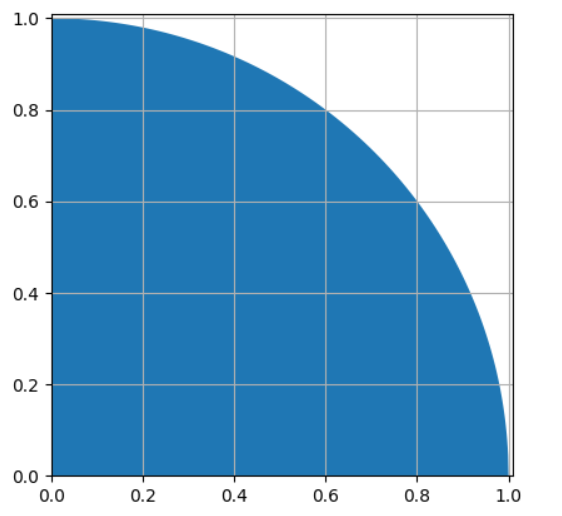

A set of functions is defined below to aid in this process. You'll need to complete these functions based on their descriptions in the cells below.

  - `mathematical`
  - `mathematical_run`
  - `graphical`
  - `graphical_run`


**Reminder: The standard error describes the dispersion of the mean (i.e., estimate of π) if the calculation were done multiple times. It is calculated using the sample standard deviation divided by the square root of the number of samples, N.**

There is also a section for plotting these results below that can be executed once these functions have been completed.

## Analysis and Questions

Answer the following questions after completing the exercises below.

1. How does the number of samples per estimate affect the *standard deviation* of the samples?

**ANSWER:** The standard deviation is independent of the number of samples - it is a property of the PDF.

2. How does the number of samples per estimate affect the *standard error* of the estimate?

**ANSWER:** The standard error goes down as the number of samples increases.

3. Which approach (mathematical or graphical) has a lower standard deviation of the samples?  Why do you think this is so?

**ANSWER:** The mathematical approach has the lower standard deviation.  All the results for the graphical approach are either 0 or 1, which means there is a lot of variation among them.  The mathematical results are arranged throughout the domain (0,1) so have a lower spread.

*(double click in this cell to edit and and your answers)*

In [20]:
import numpy as np

In [21]:
n_samples = 10_000

In [22]:
def mathematical(x):
    """
    Based on an input random number, return the value
    of the curve at the x position

    Parameters
    ----------
    x : float
        Sampled x position

    Returns
    -------
    float
        y value on the circle
    """
    
    # complete this function to return the appropriate response

    return np.sqrt(1-x*x)

In [23]:
def mathematical_run(N, verbose=True):
    # generate N random numbers between zero and one
    ys = np.random.random(N)
    # evaluate the mathematical function for each random number
    values = np.asarray([mathematical(x) for x in ys])


    ##### REPLACE "None" WITH APPROPRIATE CODE HERE #####
    # more than one line can be used if desired
    # compute the estimate of the mean
    mean = np.mean(values)
    # compute the sample sandard deviation
    std_dev = np.std(values)
    # compute the standard error of the estimate of the mean
    std_err = std_dev/np.sqrt(N)
    
    # adjust for problem symmetry
    std_err = 4*std_err
    pi_estimate = 4*mean
    if verbose:
        print(f'Average of mathematical approach: {mean}')
        print(f'Estimated value of pi: {pi_estimate}')
        print(f'Std. Dev. of mathematical approach: {std_dev}')
        print(f'Standard Error of the mathematical approach: {std_err}')
    return pi_estimate, std_err

In [24]:
pi_est, std_err = mathematical_run(n_samples)

Average of mathematical approach: 0.7857690553682591
Estimated value of pi: 3.1430762214730366
Std. Dev. of mathematical approach: 0.221620368806997
Standard Error of the mathematical approach: 0.008864814752279881


In [25]:
def graphical(x, y):
    """
    Based on two input random numbers, return whether or not
    the value lies inside the circle

    Parameters
    ----------
    x : float
        Sampled x position
    y : float
        Sampled y position
    
    Returns
    -------
    bool 
        Whether or not the input point is inside or outside the circle
    """
    
    # complete this function to return the appropriate response
    
    return x*x + y*y <= 1.0

In [26]:
def graphical_run(N, verbose=True):
    # generate N random numbers between zero and one for x and y
    xs = np.random.random(N)
    ys = np.random.random(N)

    # evaluate the graphical function for each pair of x, y values
    values = np.asarray([graphical(x, y) for x, y in zip(xs, ys)]).astype(int)

    ##### REPLACE "None" WITH APPROPRIATE CODE HERE #####
    # more than one line can be used if desired
    # compute the estimate of the mean
    mean = np.mean(values)
    # compute the sample sandard deviation
    std_dev = np.std(values)
    # compute the standard error of the estimate of the mean
    std_err = std_dev/np.sqrt(N)

    # adjust for problem symmetry
    std_dev = 4*std_dev
    std_err = 4*std_err
    pi_estimate = 4*mean
    # no need to modify the lines below
    if verbose:
        print(f'Average of graphical approach: {mean}')
        print(f'Estimated value of pi: {pi_estimate}')
        print(f'Std. Dev. of graphical approach: {std_dev}')
        print(f'Standard Error of the graphical approach: {std_err}')
    return pi_estimate, std_err

In [27]:
pi_est, std_err = graphical_run(n_samples)

Average of graphical approach: 0.7842
Estimated value of pi: 3.1368
Std. Dev. of graphical approach: 1.645504712846487
Standard Error of the graphical approach: 0.01645504712846487


# Plotting

**If your implementations of the functions above are complete. The code below
should need no modifications.**

In [28]:
from matplotlib import pyplot as plt

---- 1.0e+03 samples -----
Average of mathematical approach: 0.7858324961509254
Estimated value of pi: 3.1433299846037017
Std. Dev. of mathematical approach: 0.22757027164548949
Standard Error of the mathematical approach: 0.02878561544571924
Average of graphical approach: 0.788
Estimated value of pi: 3.152
Std. Dev. of graphical approach: 1.6348993852833882
Standard Error of the graphical approach: 0.05170005802704675
-----------------------
---- 1.0e+04 samples -----
Average of mathematical approach: 0.7845820552622209
Estimated value of pi: 3.1383282210488836
Std. Dev. of mathematical approach: 0.2250295436589458
Standard Error of the mathematical approach: 0.009001181746357832
Average of graphical approach: 0.785
Estimated value of pi: 3.14
Std. Dev. of graphical approach: 1.6432893841317178
Standard Error of the graphical approach: 0.016432893841317176
-----------------------
---- 1.0e+05 samples -----
Average of mathematical approach: 0.7858718664099033
Estimated value of pi: 3.1

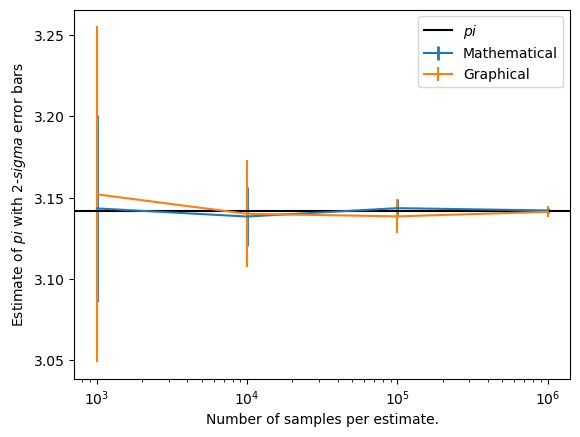

In [29]:
'''
Generate a new estimate if the mean, along with its standard error,
for different numbers of samples.
'''
np.random.seed(100) # for reproducibility
samples = (1000, 10_000, 100_000, 1_000_000)
mathematical_estimates = []
mathematical_errors = []
graphical_estimates = []
graphical_errors = []
for s in samples:
    print(f'---- {s:.1e} samples -----')
    pi_est, err = mathematical_run(s)
    mathematical_estimates.append(pi_est)
    mathematical_errors.append(2*err)  # plot 2-sigma error bars
    pi_est, err = graphical_run(s)
    graphical_estimates.append(pi_est)
    graphical_errors.append(2*err)     # plot 2-sigma error bars
    print('-----------------------')

'''
Plot the results of each estimate of the mean as a function of the number of samples.
Error bars are plotted based on the standard error for each estimate.
'''
plt.errorbar(samples, mathematical_estimates, yerr=mathematical_errors, elinewidth=2, label='Mathematical')
plt.errorbar(samples, graphical_estimates, yerr=graphical_errors, label='Graphical')
plt.xscale('log')
plt.axhline(np.pi, color='black', label='$pi$')
plt.xlabel('Number of samples per estimate.')
plt.ylabel('Estimate of $pi$ with 2-$sigma$ error bars')
plt.legend()

In [30]:
def generate_n_estimates(n, sample_size, verbose=True):
    '''
    Generate N separates estimates of pi, each using a given number of samples.
    
    Parameters
    ----------
    n : int
        Number of estimates of the mean to generate
    sample_size : int
        Number of samples to use for each estimate of the mean
    verbse : bool
        Whether or not to print output to screen from this function
        (default: True)

    Returns
    -------
    list(float)
        list of n estimates generated by the mathematical approach
    list(float)
        list of n estimates generated by the graphical approach
    '''
    
    mathematical_estimates = []
    mathematical_errors = []
    graphical_estimates = []
    graphical_errors = []
    for _ in range(n):
        pi_est, err = mathematical_run(sample_size, verbose=False)
        mathematical_estimates.append(pi_est)
        mathematical_errors.append(err)
        pi_est, err = graphical_run(sample_size, verbose=False)
        graphical_estimates.append(pi_est)
        graphical_errors.append(err)

    mathematical_std = np.std(mathematical_estimates)
    graphical_std = np.std(graphical_estimates)
    if verbose:
        print(f'Mathematical approach: {n} estimates, each with {sample_size} samples')
        print(f'Mean of estimates: {np.mean(mathematical_estimates)}')
        print(f'Median estimate of the std error: {np.median(mathematical_errors)}')
        print(f'Std deviation of estimates: {mathematical_std}')
        print(f'Graphical approach: {n} estimates, each with {sample_size} samples')
        print(f'Mean of estimates: {np.mean(graphical_estimates)}')
        print(f'Median estimate of the std error: {np.median(graphical_errors)}')
        print(f'Std deviation of estimates: {graphical_std}')
    return mathematical_estimates, graphical_estimates

Mathematical approach: 1000 estimates, each with 100 samples
Mean of estimates: 3.1413350526206276
Median estimate of the std error: 0.08875862119672037
Std deviation of estimates: 0.0908812902299254
Graphical approach: 1000 estimates, each with 100 samples
Mean of estimates: 3.1336800000000005
Median estimate of the std error: 0.16431090812649712
Std deviation of estimates: 0.17240434333275945
Mathematical approach: 1000 estimates, each with 1000 samples
Mean of estimates: 3.1408110379287417
Median estimate of the std error: 0.028280564820957033
Std deviation of estimates: 0.02810010828849625
Graphical approach: 1000 estimates, each with 1000 samples
Mean of estimates: 3.1436
Median estimate of the std error: 0.051877393920666454
Std deviation of estimates: 0.052597186236527926
Mathematical approach: 1000 estimates, each with 10000 samples
Mean of estimates: 3.1413666168033125
Median estimate of the std error: 0.008928202212372532
Std deviation of estimates: 0.008859792317302294
Graph

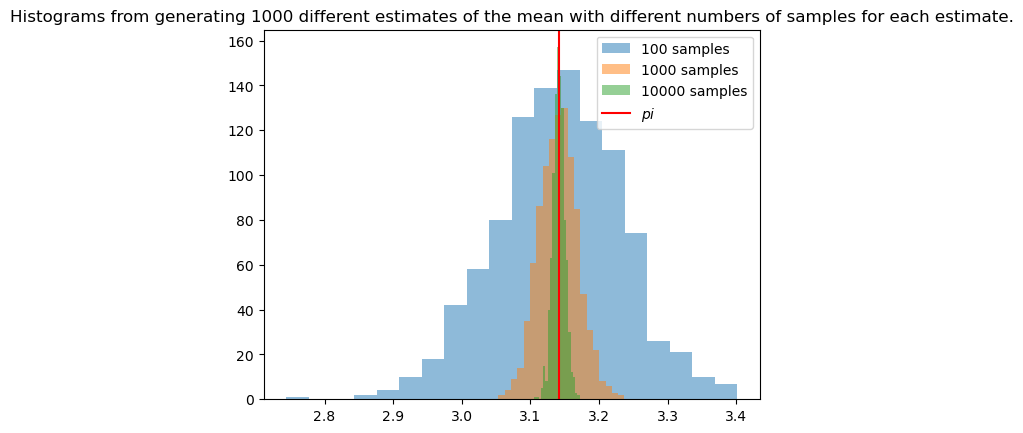

In [31]:
'''
Generate a set of N estimates of the mean for different numbers of samples.

As they are generated, a histogram is plotted of each set of N estimates.
'''
math_est = []
graph_est = []
n_estimates = 1_000
samples = (100, 1_000, 10_000)
for s in samples:
    m, g = generate_n_estimates(n_estimates, s)
    math_est.append(m)
    graph_est.append(g)
    plt.hist(m, bins=20, alpha=0.5, label=f'{s} samples')
plt.axvline(np.pi, color="red", label='$pi$')
plt.title(f"Histograms from generating {n_estimates} different estimates of the mean "
          "with different numbers of samples for each estimate.")
plt.legend(loc='upper right')
plt.show()